## Ejercicio 5: Análisis de Reseñas de Amazon

Usando el dataset de reseñas de Amazon disponible en:
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

Realiza:
1. Carga y preprocesa el dataset
2. Analiza la distribución de puntuaciones
3. Identifica patrones temporales en las reseñas:
   - Evolución de puntuaciones promedio por mes/año
   - Cambios en la longitud de las reseñas
4. Agrupa productos por categoría y analiza diferencias en:
   - Puntuación promedio
   - Cantidad de reseñas
   - Sentimiento general
5. Crea un sistema simple de detección de reseñas potencialmente falsas basado en múltiples criterios

Conceptos evaluados: text processing, análisis temporal, detección de anomalías, agregaciones complejas

### 1. Carga y preprocesamiento de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

# Configuración de visualización
sns.set_theme()  # Usamos el tema por defecto de seaborn en lugar de plt.style
pd.set_option('display.max_columns', None)

# Cargar el dataset
df = pd.read_csv('Reviews.csv')

# Mostrar información básica del dataset
print("Información del dataset:")
print(df.info())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Limpieza básica
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df['ReviewLength'] = df['Text'].str.len()
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month

print("\nPrimeras 5 filas del dataset procesado:")
df.head()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None

Valores nulos por columna:
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ReviewLength,Year,Month
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,263,2011,4
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190,2012,9
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,509,2008,8
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,219,2011,6
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,140,2012,10


### 2. Análisis de distribución de puntuaciones

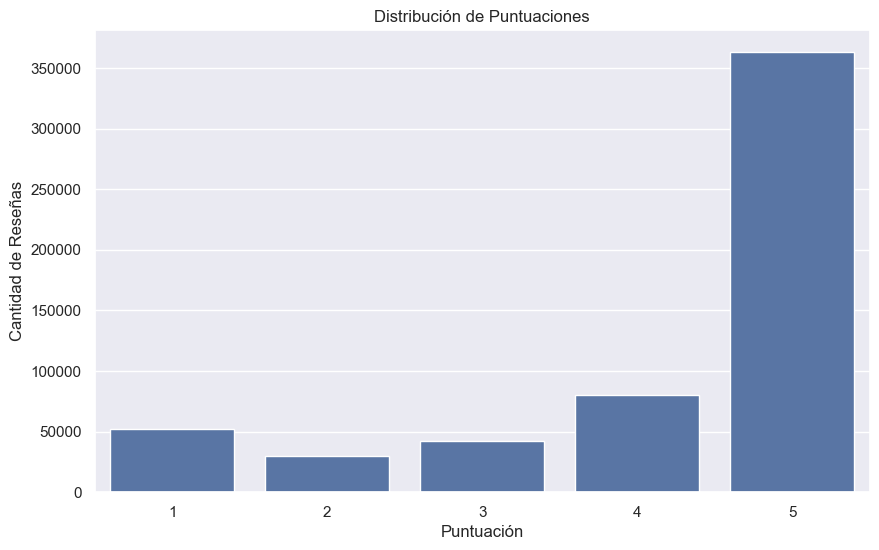

Estadísticas descriptivas de las puntuaciones:
count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

Porcentaje de reseñas por puntuación:
Score
1     9.19
2     5.24
3     7.50
4    14.19
5    63.88
Name: count, dtype: float64


In [2]:
# Crear gráfico de distribución de puntuaciones
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Score')
plt.title('Distribución de Puntuaciones')
plt.xlabel('Puntuación')
plt.ylabel('Cantidad de Reseñas')
plt.show()

# Estadísticas descriptivas de las puntuaciones
print("Estadísticas descriptivas de las puntuaciones:")
print(df['Score'].describe())

# Calcular porcentajes por puntuación
score_percentages = (df['Score'].value_counts() / len(df) * 100).round(2)
print("\nPorcentaje de reseñas por puntuación:")
print(score_percentages.sort_index())

### 3. Patrones temporales en las reseñas

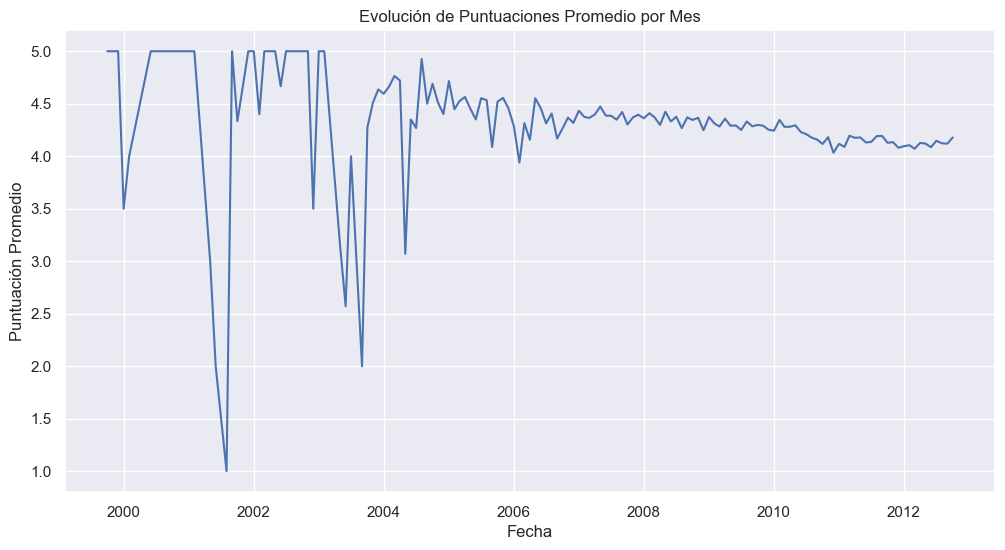

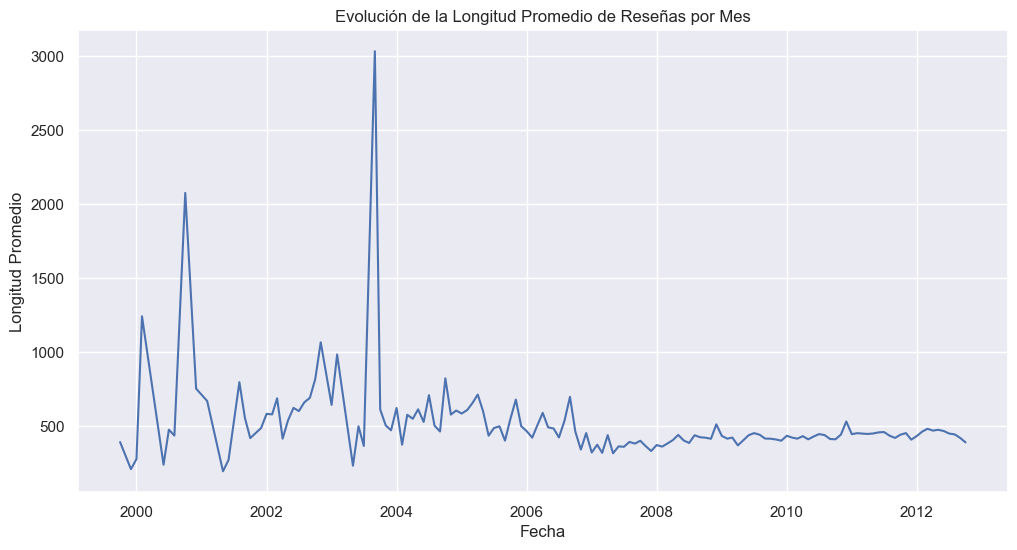

In [3]:
# Evolución de puntuaciones promedio por mes/año
monthly_scores = df.groupby(['Year', 'Month'])['Score'].mean().reset_index()
monthly_scores['Date'] = pd.to_datetime(monthly_scores[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
plt.plot(monthly_scores['Date'], monthly_scores['Score'])
plt.title('Evolución de Puntuaciones Promedio por Mes')
plt.xlabel('Fecha')
plt.ylabel('Puntuación Promedio')
plt.grid(True)
plt.show()

# Cambios en la longitud de las reseñas
monthly_lengths = df.groupby(['Year', 'Month'])['ReviewLength'].mean().reset_index()
monthly_lengths['Date'] = pd.to_datetime(monthly_lengths[['Year', 'Month']].assign(DAY=1))

plt.figure(figsize=(12, 6))
plt.plot(monthly_lengths['Date'], monthly_lengths['ReviewLength'])
plt.title('Evolución de la Longitud Promedio de Reseñas por Mes')
plt.xlabel('Fecha')
plt.ylabel('Longitud Promedio')
plt.grid(True)
plt.show()

### 4. Análisis por categoría de producto

Top 10 productos más reseñados:
        ProductId  Puntuación_Promedio  Cantidad_Reseñas  Longitud_Promedio
71170  B007JFMH8M                 4.58               913             284.68
37898  B0026RQTGE                 4.59               632             322.94
42257  B002QWHJOU                 4.59               632             322.94
42263  B002QWP89S                 4.59               632             322.94
42264  B002QWP8H0                 4.59               632             322.94
46205  B003B3OOPA                 4.74               623             476.67
28624  B001EO5Q64                 4.75               567             502.63
20497  B000VK8AVK                 4.31               564             412.42
23309  B0013NUGDE                 4.31               564             412.42
35243  B001RVFEP2                 4.31               564             412.42


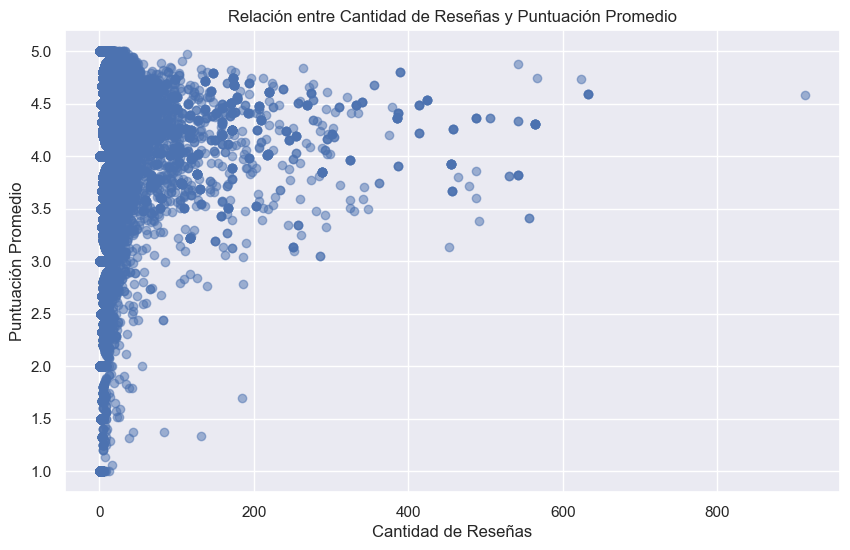

In [4]:
# Crear un análisis básico por ProductId
product_analysis = df.groupby('ProductId').agg({
'Score': ['mean', 'count'],
'ReviewLength': 'mean'
}).round(2)

product_analysis.columns = ['Puntuación_Promedio', 'Cantidad_Reseñas', 'Longitud_Promedio']
product_analysis = product_analysis.reset_index()

# Mostrar productos más reseñados
print("Top 10 productos más reseñados:")
print(product_analysis.nlargest(10, 'Cantidad_Reseñas'))

# Visualizar relación entre cantidad de reseñas y puntuación promedio
plt.figure(figsize=(10, 6))
plt.scatter(product_analysis['Cantidad_Reseñas'], 
           product_analysis['Puntuación_Promedio'], 
           alpha=0.5)
plt.title('Relación entre Cantidad de Reseñas y Puntuación Promedio')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Puntuación Promedio')
plt.show()

### 5. Sistema de detección de reseñas potencialmente falsas

In [5]:
def detect_suspicious_reviews(df):
    # Crear características para detección
    df['suspicious_score'] = 0
    
    # Crear columna de fecha
    df['Date'] = df['Time'].dt.date  # Primero extraemos la fecha
    
    # 1. Reseñas extremadamente cortas o largas
    length_quantiles = df['ReviewLength'].quantile([0.05, 0.95])
    df.loc[df['ReviewLength'] < length_quantiles[0.05], 'suspicious_score'] += 1
    df.loc[df['ReviewLength'] > length_quantiles[0.95], 'suspicious_score'] += 1

    # 2. Usuario con muchas reseñas en poco tiempo
    user_daily_reviews = df.groupby(['UserId', 'Date']).size().reset_index(name='daily_reviews')
    suspicious_users = user_daily_reviews[user_daily_reviews['daily_reviews'] > 5]['UserId'].unique()
    df.loc[df['UserId'].isin(suspicious_users), 'suspicious_score'] += 1

    # 3. Puntuaciones extremas (1 o 5) con texto corto
    df.loc[(df['Score'].isin([1, 5])) & (df['ReviewLength'] < 50), 'suspicious_score'] += 1

    # Clasificar reseñas como sospechosas si tienen un score alto
    df['is_suspicious'] = df['suspicious_score'] >= 2

    return df

# Aplicar el sistema de detección
df = detect_suspicious_reviews(df)

# Mostrar resultados
print("Porcentaje de reseñas sospechosas:")
print(f"{(df['is_suspicious'].mean() * 100).round(2)}%")

# Analizar características de reseñas sospechosas vs no sospechosas
suspicious_stats = df.groupby('is_suspicious').agg({
    'Score': 'mean',
    'ReviewLength': 'mean',
    'ProductId': 'count'
}).round(2)

print("\nEstadísticas comparativas:")
print(suspicious_stats)

Porcentaje de reseñas sospechosas:
3.25%

Estadísticas comparativas:
               Score  ReviewLength  ProductId
is_suspicious                                
False           4.18        409.59     549982
True            4.15       1229.16      18472
